In [48]:
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dense, Flatten, Dropout

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import svm

In [49]:
HEIGHT = 150
WIDTH = 150

TRAIN_DIR = "C:\\Users\\admin\\Desktop\\anotherdata\\train"
TEST_DIR = "C:\\Users\\admin\\Desktop\\anotherdata\\testagain"

BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
        horizontal_flip=True, 
        vertical_flip=False, 
        rotation_range=10,
        rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(TRAIN_DIR, 
                                                    target_size=(HEIGHT, WIDTH), 
                                                    batch_size=BATCH_SIZE)

test_generator = train_datagen.flow_from_directory(TEST_DIR, 
                                                    target_size=(HEIGHT, WIDTH), 
                                                    batch_size=BATCH_SIZE, 
                                                    shuffle = False)

Found 380 images belonging to 2 classes.
Found 101 images belonging to 2 classes.


In [50]:
# Building a Sequential Model using Sequential function

#create model
model = Sequential()

#add model layers
model.add(Conv2D(16, kernel_size=3, activation='relu', input_shape=(HEIGHT, WIDTH, 3)))
model.add(Conv2D(16, kernel_size=3, activation='relu'))

model.add(MaxPooling2D())

model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Conv2D(32, kernel_size=3, activation='relu'))

model.add(MaxPooling2D())

model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(Conv2D(64, kernel_size=3, activation='relu'))

model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Print the snapshot of the model
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 146, 146, 16)      2320      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 73, 73, 16)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 71, 71, 32)        4640      
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 69, 69, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 34, 34, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 32, 32, 64)       

In [51]:
# Compiling your CNN Model

NUM_EPOCHS = 25
num_train_images = train_generator.samples

adam = Adam(lr=0.0001)
model.compile(adam, loss='squared_hinge', metrics=['accuracy'])

C:\Users\admin\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [52]:
# Adding a Model Checkpoint (saving our model after every epoch)

filepath="model_weights.h5"
checkpoint = ModelCheckpoint(filepath, monitor=["acc"], verbose=1, mode='max')
#checkpoint = ModelCheckpoint(filepath, monitor=["val_acc"], verbose=1, mode='max')

In [53]:
# Training your CNN Model using the generator that we created earlier

history = model.fit(train_generator, 
                              validation_data=test_generator,
                              epochs=NUM_EPOCHS,
                              steps_per_epoch=num_train_images // BATCH_SIZE, 
                              shuffle=True, 
                              callbacks=[checkpoint])

Epoch 1/25
11/11 [==============================] - 32s 3s/step - loss: 1.2303 - accuracy: 0.7011 - val_loss: 1.1953 - val_accuracy: 0.9109

Epoch 00001: saving model to model_weights.h5
Epoch 2/25
11/11 [==============================] - 23s 2s/step - loss: 1.1148 - accuracy: 0.8937 - val_loss: 0.9815 - val_accuracy: 0.9703

Epoch 00002: saving model to model_weights.h5
Epoch 3/25
11/11 [==============================] - 22s 2s/step - loss: 0.8745 - accuracy: 0.9138 - val_loss: 0.6190 - val_accuracy: 0.9901

Epoch 00003: saving model to model_weights.h5
Epoch 4/25
11/11 [==============================] - 29s 3s/step - loss: 0.7154 - accuracy: 0.8966 - val_loss: 0.5789 - val_accuracy: 0.9604

Epoch 00004: saving model to model_weights.h5
Epoch 5/25
11/11 [==============================] - 26s 2s/step - loss: 0.6462 - accuracy: 0.9339 - val_loss: 0.5955 - val_accuracy: 0.9604

Epoch 00005: saving model to model_weights.h5
Epoch 6/25
11/11 [==============================] - 24s 2s/step -

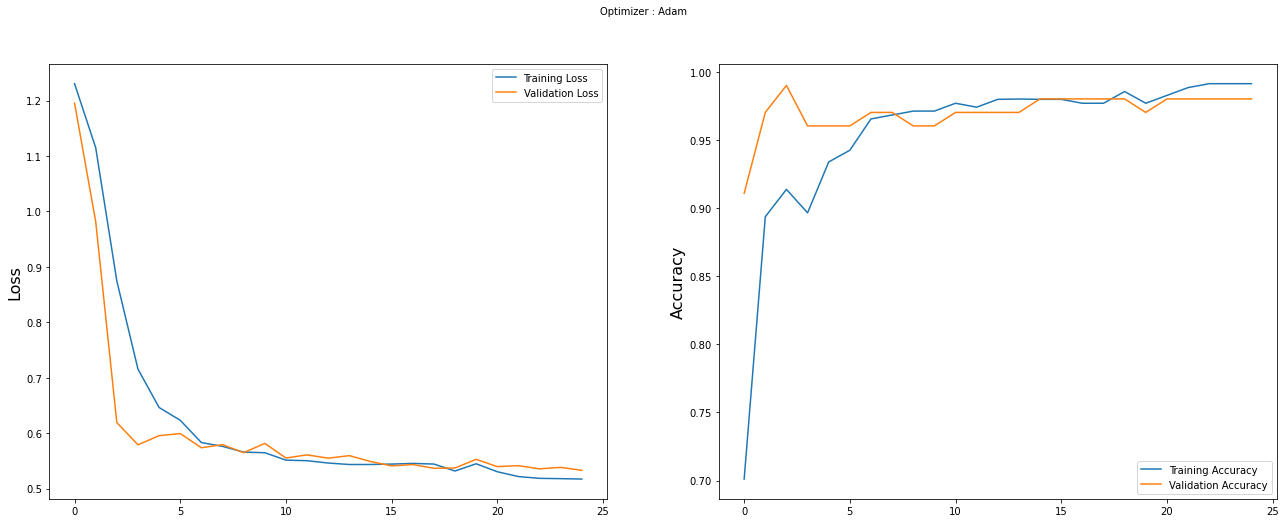

In [54]:
# plot the evolution of Loss and Acuracy on the train and validation sets

import matplotlib.pyplot as plt

plt.figure(figsize=(22, 8))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [55]:
test_generator.class_indices.keys()

dict_keys(['cancer', 'normal'])

In [56]:
from mlxtend.plotting import plot_confusion_matrix



In [57]:
#Confution Matrix and Classification Report
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

Confusion Matrix


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

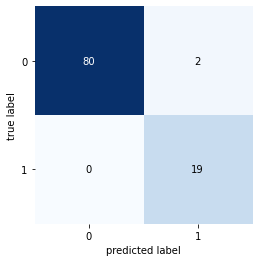

In [58]:
print('Confusion Matrix')
target_names = test_generator.class_indices.keys()
plot_confusion_matrix(confusion_matrix(test_generator.classes, y_pred), target_names)

In [59]:
print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

      cancer       1.00      0.98      0.99        82
      normal       0.90      1.00      0.95        19

    accuracy                           0.98       101
   macro avg       0.95      0.99      0.97       101
weighted avg       0.98      0.98      0.98       101



In [60]:
np.set_printoptions(suppress=True)

In [61]:
import pandas as pd

target_names = test_generator.class_indices.keys()

image_path="C:\\Users\\admin\\Desktop\\anotherdata\\test\\cancer\\000108.png"
img = image.load_img(image_path, target_size=(HEIGHT, WIDTH))

img = np.expand_dims(img, axis=0)
img = img/255

preds = model.predict(img).flatten()

pd.DataFrame(preds.reshape(1, 2), columns=target_names)

,cancer,normal
0,0.999998,0.000002
